In [1]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
import utils
key = 'SK_ID_CURR'
target = 'TARGET'

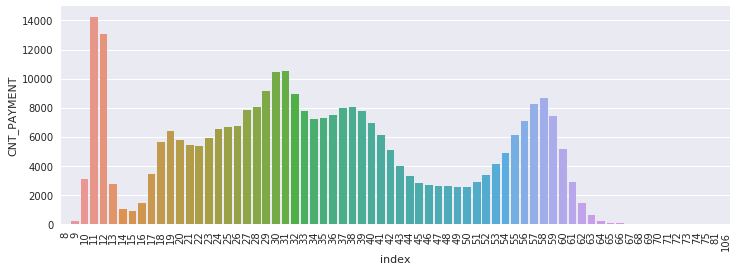

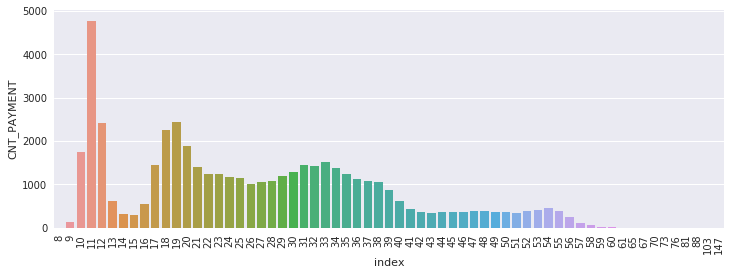

SystemExit: 

In [47]:
app = utils.read_df_pkl('../input/clean_cpy_app*').reset_index()
train = app[~app[target].isnull()]
test = app[app[target].isnull()]
train_cnt = train['CNT_PAYMENT'].value_counts().reset_index().sort_values(by='index')
test_cnt = test['CNT_PAYMENT'].value_counts().reset_index().sort_values(by='index')
plt.figure(figsize=(12, 4))
bar_train = sns.barplot(data=train_cnt, x='index', y='CNT_PAYMENT', )
bar_train.set_xticklabels(rotation=90, labels=train_cnt['index'])
plt.show()
plt.figure(figsize=(12, 4))
bar_test = sns.barplot(data=test_cnt, x='index', y='CNT_PAYMENT')
bar_test.set_xticklabels(rotation=90, labels=test_cnt['index'])
plt.show()

In [14]:
app = utils.read_df_pkl('../input/clean_cpy_app*').reset_index()[[key, target]]
train_ir = utils.read_pkl_gzip('../features/3_third_valid/train_ir_18@.gz')
test_ir = utils.read_pkl_gzip('../features/3_third_valid/test_ir_18@.gz')
ir = np.hstack((train_ir, test_ir))
app['ir_18'] = ir
bur = utils.read_df_pkl('../input/clean_bur*')
ab_ir = app.merge(bur, on=key, how='inner')
tmp = ab_ir.groupby(key)[['SK_ID_BUREAU', target, 'ir_18']].max().reset_index()
sys.exit()

plt.figure(figsize=(10,10))
key_b = 'SK_ID_BUREAU'
train = tmp[tmp[target]>=0]
test = tmp[tmp[target].isnull()]
train[key_b].plot(kind='kde')
test[key_b].plot(kind='kde')

100%|██████████| 3/3 [00:00<00:00, 12.06it/s]


SystemExit: 

100%|██████████| 3/3 [00:00<00:00, 14.19it/s]


<Figure size 864x576 with 0 Axes>

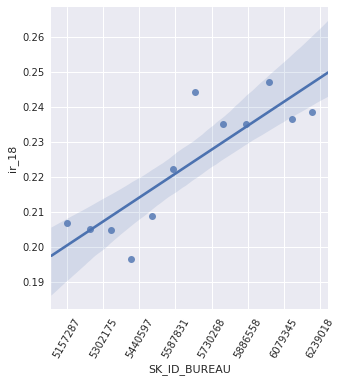

<Figure size 864x576 with 0 Axes>

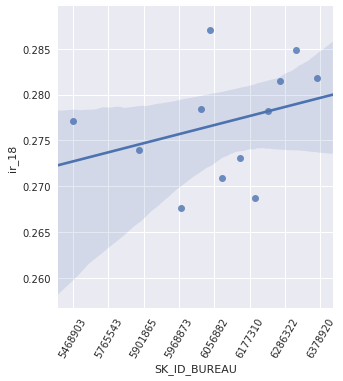

In [26]:
kb = 'SK_ID_BUREAU'
app = utils.read_df_pkl('../input/clean_cpy_app*').reset_index()[[key, target]]
train_ir = utils.read_pkl_gzip('../features/3_third_valid/train_ir_18@.gz')
test_ir = utils.read_pkl_gzip('../features/3_third_valid/test_ir_18@.gz')
ir = np.hstack((train_ir, test_ir))
app['ir_18'] = ir

bur = utils.read_df_pkl('../input/clean_bur*')
ab_ir = app.merge(bur, on=key, how='inner')

tmp = ab_ir.groupby(key)[['SK_ID_BUREAU', target, 'ir_18']].max().reset_index()
train = tmp[tmp[target]>=0]
test = tmp[tmp[target].isnull()]

plt.figure(figsize=(12,8))

train[kb] = pd.qcut(q=12, x=train[kb])
train = train.groupby(kb)['ir_18'].mean().reset_index()
train[kb] = train[kb].map(lambda x: int(str(x)[1:8]))
lm_train = sns.lmplot(x=kb, y='ir_18', data=train)
lm_train.set_xticklabels(rotation=60, labels=train[kb])
plt.show()

plt.figure(figsize=(12,8))
test[kb] = pd.qcut(q=12, x=test[kb])
test = test.groupby(kb)['ir_18'].mean().reset_index()
test[kb] = test[kb].map(lambda x: int(str(x)[1:8]))
lm_test = sns.lmplot(x=kb, y='ir_18', data=test)
lm_test.set_xticklabels(rotation=60, labels=test[kb])
plt.show()